In [1]:
import deepql
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("gen_data/constant_force.csv")

#print('maximum position:',df['position'].max())
#print('minimum position:',df['position'].min())
#print('minimum velocity:',df['velocity'].min())
#print('maximum velocity:',df['velocity'].max())

df.head()


,time,position,velocity
0,0.00,10.00000,0.00
1,0.01,10.00005,0.01
2,0.02,10.00020,0.02
3,0.03,10.00045,0.03
4,0.04,10.00080,0.04


In [8]:
df = deepql.separate_data(df, run_length=150, xmax=None, vmax=None)
#print(f'len of data: {len(df)}')
df.head()

,x_initial,v_initial,x_step10,v_step10,x_step20,v_step20,x_step30,v_step30,x_step40,v_step40,...,x_step110,v_step110,x_step120,v_step120,x_step130,v_step130,x_step140,v_step140,x_step150,v_step150
0,10.000,0.0,10.005,0.1,10.020,0.2,10.045,0.3,10.080,0.4,...,10.605,1.1,10.720,1.2,10.845,1.3,10.980,1.4,11.125,1.5
1,10.005,0.1,10.020,0.2,10.045,0.3,10.080,0.4,10.125,0.5,...,10.720,1.2,10.845,1.3,10.980,1.4,11.125,1.5,11.280,1.6
2,10.020,0.2,10.045,0.3,10.080,0.4,10.125,0.5,10.180,0.6,...,10.845,1.3,10.980,1.4,11.125,1.5,11.280,1.6,11.445,1.7
3,10.045,0.3,10.080,0.4,10.125,0.5,10.180,0.6,10.245,0.7,...,10.980,1.4,11.125,1.5,11.280,1.6,11.445,1.7,11.620,1.8
4,10.080,0.4,10.125,0.5,10.180,0.6,10.245,0.7,10.320,0.8,...,11.125,1.5,11.280,1.6,11.445,1.7,11.620,1.8,11.805,1.9


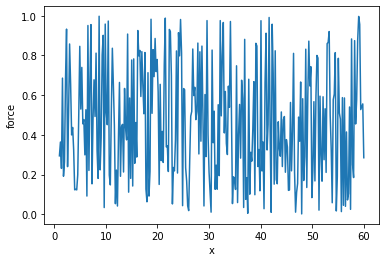

In [9]:
model = deepql.diffnet.diffNet(
    depth=150, dt=1e-2, N=300, lower_limit=1.0, upper_limit=60,
    post_process=True, pp_mu=0, pp_epsilon=1e-2, force_type='position'
)

model.plot_parameters()

In [14]:
model_name = "0523"
# Hyperparameters
smooth_rate = 0.03
constrain_rate = 0 # F(v=0) = 0
targets_rate = 1.25

batch_size = 85//3
shuffle_batch = True

learning_rate = 0.4

# Define number of epochs
num_epochs = 5000

# Define loss function and optimizer
L2_loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# initializing data
my_dataset = deepql.MyDataset(df, step_size=150)
my_dataloader = deepql.DataLoader(my_dataset, batch_size=batch_size, shuffle=shuffle_batch)


running_loss = 0
loss_array = []

Finished training


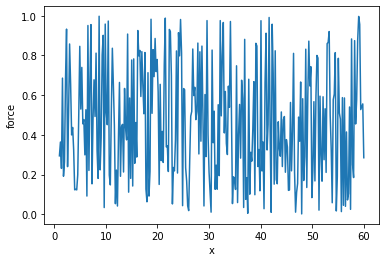

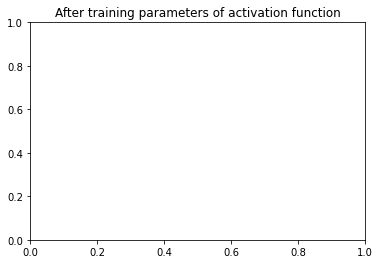

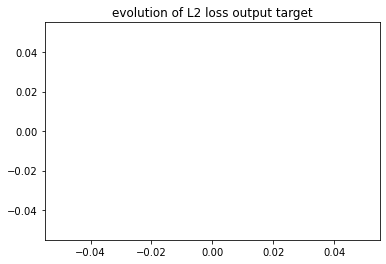

In [13]:
#used for graphs
max_i = len(my_dataloader)

# Iterate through epochs
for epoch in range(num_epochs):
    break
    # Iterate through data in the DataLoader
    for i, data in enumerate(my_dataloader, 0):
        # Get inputs and targets from data
        inputs, targets = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model.forward(inputs)

        
        # Compute loss
        L2_computed_loss = L2_loss(outputs, targets)
        loss = smooth_rate * smooth_loss(list(model.parameters())[0]) +\
            constrain_rate*physics_constrain(list(model.parameters())[0]) + targets_rate * L2_computed_loss

        loss_array.append(loss.item())
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print("L2_loss:", L2_computed_loss.detach().item())
            #loss_array.append(L2_computed_loss.detach().item())
            print('[Epoch %d, Mini-batch %5d] Loss: %.3f' %
                (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    if epoch % 100 == 10:
        # saving the model
        #torch.save(model, f"./model/{name}_epoch{epoch}.pt")
        
        #ploting
        model.plot_parameters()
        # plt.show()
        # plt.savefig(f"./evolution_force/{name}_epoch_{epoch}_loss_{running_loss :.2f}.png")


# finish training
#torch.save(model, f"./model/{name}_epoch{epoch}.pt")
print('Finished training')

model.plot_parameters()
plt.title("After training parameters of activation function")
plt.show()

# plot loss
plt.plot(loss_array)
plt.title("evolution of L2 loss output target")
plt.show()